In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 8.1 字符串操作

### 8.1.1 str属性

8.1 DataFrame 对象的创建

In [2]:
df = pd.DataFrame({
    'city':['Tokyo','osaka',np.nan,'TOKYO'],
    'job' : [np.nan,'Engineer','teacher','Teacher'],
    }, index=['Taro','jiro',np.nan,'Ichiro ']
)

df

,city,job
Taro,Tokyo,NaN
jiro,osaka,Engineer
NaN,NaN,teacher
Ichiro,TOKYO,Teacher


8.2 Series 对象和 Index 对象的 str 属性

In [3]:
print(df['city'].str)
print(df.index.str)

In [4]:
# df.str#没有这个属性

8.3 str 属性的 lower 方法

In [5]:
df['city'].str.lower()

Taro       tokyo
jiro       osaka
NaN          NaN
Ichiro     tokyo
Name: city, dtype: object

8.4 使用 map 方法和匿名函数将字符串转换成小写

In [6]:
df['city'].map(lambda x: x.lower(), na_action='ignore')

Taro       tokyo
jiro       osaka
NaN          NaN
Ichiro     tokyo
Name: city, dtype: object

8.5 大写和小写字符串的比较

In [7]:
print(df['city'][0] == df['city'][3])
print(df['city'].str.lower()[0] == df['city'].str.lower()[3])

False
True


C:\Users\liye\AppData\Local\Temp\ipykernel_8236\2868258342.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df['city'][0] == df['city'][3])
C:\Users\liye\AppData\Local\Temp\ipykernel_8236\2868258342.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df['city'].str.lower()[0] == df['city'].str.lower()[3])


8.6 str 属性的 upper 方法和 len 方法

In [8]:
df['city'].str.upper()

Taro       TOKYO
jiro       OSAKA
NaN          NaN
Ichiro     TOKYO
Name: city, dtype: object

In [9]:
df['city'].str.len()

Taro       5.0
jiro       5.0
NaN        NaN
Ichiro     5.0
Name: city, dtype: float64

8.7 Index 对象的 str 属性和 len 方法

In [10]:
df.index.str.len()

Index([4.0, 4.0, nan, 7.0], dtype='float64')

8.8 str 属性的 strip 方法

In [11]:
df.index.str.strip()

Index(['Taro', 'jiro', nan, 'Ichiro'], dtype='object')

In [12]:
df.index.str.strip().str.len()

Index([4.0, 4.0, nan, 6.0], dtype='float64')

8.9 str 属性的 capitalize 方法

In [13]:
df.index.str.capitalize()

Index(['Taro', 'Jiro', nan, 'Ichiro '], dtype='object')

### 8.1.2 字符串的分割

8.10 str 属性的 split 方法

In [14]:
ser = pd.Series(['a+b+c','d+e','f'])
ser

0    a+b+c
1      d+e
2        f
dtype: object

In [15]:
ser.str.split(pat='+')

0    [a, b, c]
1       [d, e]
2          [f]
dtype: object

8.11 split 方法的 expand 参数

In [16]:
ser.str.split(pat='+', expand=True)

,0,1,2
0,a,b,c
1,d,e,None
2,f,None,None


8.12 split 方法的参数 n

In [17]:
ser.str.split('+', n=1, expand=True)

,0,1
0,a,b+c
1,d,e
2,f,None


8.13 split 方法的 pat 参数与正则表达式

In [18]:
ser = pd.Series(['あ+い-う','え*お','か'])
ser

0    あ+い-う
1      え*お
2        か
dtype: object

In [19]:
ser.str.split(pat='\W', expand=True)

,0,1,2
0,あ,い,う
1,え,お,None
2,か,None,None


### 8.1.3 字符串的替换

8.14 Series 对象的创建

In [20]:
ser = pd.Series([
    '2年级1班 山田君',
    '2-1 高桥君君',
    '2年级3班 佐藤君',
    '2-4 内山君'
])

ser

0    2年级1班 山田君
1     2-1 高桥君君
2    2年级3班 佐藤君
3      2-4 内山君
dtype: object

8.15 str 属性的 split 方法

In [21]:
df = ser.str.split(' ', expand=True)
df.columns = ['class','name']
df2 = df.copy()
df2

,class,name
0,2年级1班,山田君
1,2-1,高桥君君
2,2年级3班,佐藤君
3,2-4,内山君


8.16 str 属性的 replace 方法（置换）

In [22]:
df2['class'] = df2['class'].str.replace(pat='年', repl='-')
df2

,class,name
0,2-级1班,山田君
1,2-1,高桥君君
2,2-级3班,佐藤君
3,2-4,内山君


8.17 str 属性的 replace 方法（删除）

In [23]:
df2['class'] = df2['class'].str.replace(pat='班', repl='')
df2

,class,name
0,2-级1,山田君
1,2-1,高桥君君
2,2-级3,佐藤君
3,2-4,内山君


8.18 replace 方法的参数 n

In [24]:
df2['name'].str.replace(pat='君', n=1, repl='')

0     山田
1    高桥君
2     佐藤
3     内山
Name: name, dtype: object

In [25]:
df2['name'].str.replace(pat='君', n=2, repl='')

0    山田
1    高桥
2    佐藤
3    内山
Name: name, dtype: object

8.19 正则表达式的创建

In [26]:
pattern = '年级|班|-'
pattern

'年级|班|-'

8.20 replace 方法、pat 参数和正则表达式

In [27]:
df['class'] = df['class'].str.replace(pat=pattern, repl='')
df

,class,name
0,2年级1班,山田君
1,2-1,高桥君君
2,2年级3班,佐藤君
3,2-4,内山君


8.21 map 方法和 replace 方法

In [28]:
df['class'] = df['class'].map(lambda x: x[0] + '-' + x[1])
df['name'] = df['name'].str.replace('君', n=2, repl='')
df

,class,name
0,2-年,山田
1,2--,高桥
2,2-年,佐藤
3,2--,内山


8.22 replace 方法和 case 参数

In [29]:
ser = pd.Series(['aBcD','AbCd'])
ser

0    aBcD
1    AbCd
dtype: object

In [30]:
ser.str.replace('a', repl='')

0     BcD
1    AbCd
dtype: object

In [31]:
ser.str.replace('a', repl='', case=False)

0    BcD
1    bCd
dtype: object

### 8.1.4 字符串的提取

8.23 DataFrame 对象的创建

In [32]:
df = pd.DataFrame([
    'Tokyo 2019-01-02 0 158.2',
    'Osaka 2018-12-22 0 161.8',
    'Tokyo 2019-02-22 0 169.1',
    'Sapporo 2019-01-01 1 179.2',
    'Osaka 2018-11-29 182.1']
    , columns=['data']
)

df

,data
0,Tokyo 2019-01-02 0 158.2
1,Osaka 2018-12-22 0 161.8
2,Tokyo 2019-02-22 0 169.1
3,Sapporo 2019-01-01 1 179.2
4,Osaka 2018-11-29 182.1


8.24 str 属性的 extract 方法

In [33]:
df['date'] = df['data'].str.extract('(....-..-..)', expand=True)
df

,data,date
0,Tokyo 2019-01-02 0 158.2,2019-01-02
1,Osaka 2018-12-22 0 161.8,2018-12-22
2,Tokyo 2019-02-22 0 169.1,2019-02-22
3,Sapporo 2019-01-01 1 179.2,2019-01-01
4,Osaka 2018-11-29 182.1,2018-11-29


8.25 str 属性的 extract 方法（缺失值）

In [34]:
df['sex'] = df['data'].str.extract('( \d )', expand=True)
df

,data,date,sex
0,Tokyo 2019-01-02 0 158.2,2019-01-02,0
1,Osaka 2018-12-22 0 161.8,2018-12-22,0
2,Tokyo 2019-02-22 0 169.1,2019-02-22,0
3,Sapporo 2019-01-01 1 179.2,2019-01-01,1
4,Osaka 2018-11-29 182.1,2018-11-29,NaN


8.26 str 属性的 extract 方法

In [35]:
df['height'] = df['data'].str.extract('(\d\d\d\.\d)', expand=True)
df['location'] = df['data'].str.extract('([A-Z]\w{0,})', expand=True)
df

,data,date,sex,height,location
0,Tokyo 2019-01-02 0 158.2,2019-01-02,0,158.2,Tokyo
1,Osaka 2018-12-22 0 161.8,2018-12-22,0,161.8,Osaka
2,Tokyo 2019-02-22 0 169.1,2019-02-22,0,169.1,Tokyo
3,Sapporo 2019-01-01 1 179.2,2019-01-01,1,179.2,Sapporo
4,Osaka 2018-11-29 182.1,2018-11-29,NaN,182.1,Osaka


8.27 extract 方法的 pat 参数和附带名称的组

In [36]:
df['data'].str.extract(pat='(?P<身高>\d\d\d\.\d)', expand=True)

,身高
0,158.2
1,161.8
2,169.1
3,179.2
4,182.1


### 8.1.5 字符串的模式匹配

8.28 DataFrame 对象的创建

In [37]:
df = pd.DataFrame({
    'name':['Matsuda','Fuji',np.nan,'murayama'],
    'div':['sales','HR','hr',np.nan]}
)
df

,name,div
0,Matsuda,sales
1,Fuji,HR
2,NaN,hr
3,murayama,NaN


8.29 str 属性的 contains 方法和 case 参数（True）

In [38]:
df['div'].str.contains('HR', case=True)

0    False
1     True
2    False
3      NaN
Name: div, dtype: object

8.30 str 属性的 contains 方法和 case 参数（False）

In [39]:
df['div'].str.contains('HR', case=False)

0    False
1     True
2     True
3      NaN
Name: div, dtype: object

8.31 contains 方法和正则表达式

In [40]:
df['div'].str.contains('sales|hr', case=False)

0    True
1    True
2    True
3     NaN
Name: div, dtype: object

8.32 contains 方法和 na 参数

In [41]:
df['div'].str.contains('sales|hr', case=False, na=False)

0     True
1     True
2     True
3    False
Name: div, dtype: bool

8.33 使用 contains 方法进行索引引用

In [42]:
cond = df['div'].str.contains('sales|hr', case=False, na=False)
df[cond]

,name,div
0,Matsuda,sales
1,Fuji,HR
2,NaN,hr


8.34 endswith 方法和 startswith 方法

In [43]:
df['div'].str.endswith(pat='r')

0    False
1    False
2     True
3      NaN
Name: div, dtype: object

In [44]:
df['name'].str.startswith(pat='M')

0     True
1    False
2      NaN
3    False
Name: name, dtype: object

### 8.1.6 从字符串到虚拟变量

8.35 Series 对象的创建

In [45]:
ser = pd.Series([
    'blue,red,blue,yellow',
    'red,yellow',
    'green,blue,red',
    'yellow,green,red',
])

ser

0    blue,red,blue,yellow
1              red,yellow
2          green,blue,red
3        yellow,green,red
dtype: object

8.36 str 属性 get_dummies 方法

In [46]:
ser.str.get_dummies(sep=',')

,blue,green,red,yellow
0,1,0,1,1
1,0,0,1,1
2,1,1,1,0
3,0,1,1,1


8.37 str 属性的 get_dummies 方法和缺失值

In [47]:
ser[4] = np.nan
ser.str.get_dummies(sep=',')

,blue,green,red,yellow
0,1,0,1,1
1,0,0,1,1
2,1,1,1,0
3,0,1,1,1
4,0,0,0,0


## 8.2 数据的可视化

### 8.2.1 plot方法

8.38 DataFrame 对象的创建

In [48]:
np.random.seed(0)
val = np.random.randint(-5, 5, size=500).reshape(100,5)
df = pd.DataFrame(val, columns=list('abcde')).cumsum()
df.head(3)

,a,b,c,d,e
0,0,-5,-2,-2,2
1,4,-7,-2,-5,1
2,6,-6,1,-2,-3


8.39 Series 类的 plot 方法

<Axes: >

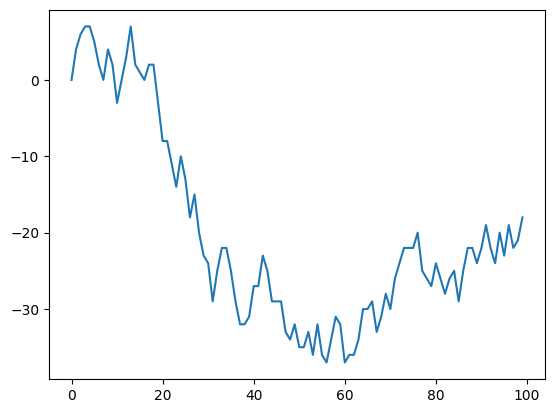

In [49]:
df['a'].plot(kind='line')

8.40 DataFrame 类的 plot 方法

<Axes: >

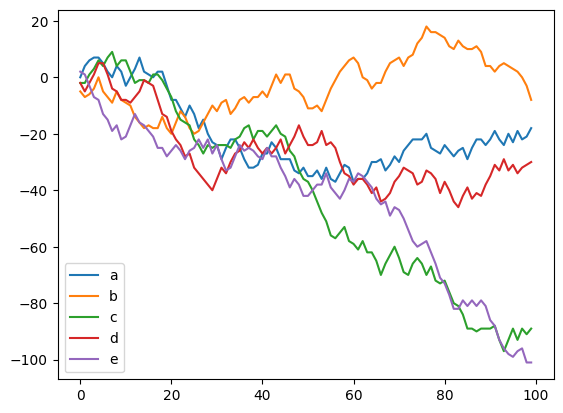

In [50]:
df.plot(kind='line')

8.41 plot 方法的 title 参数和 legend 参数

<Axes: title={'center': 'column b line plot'}>

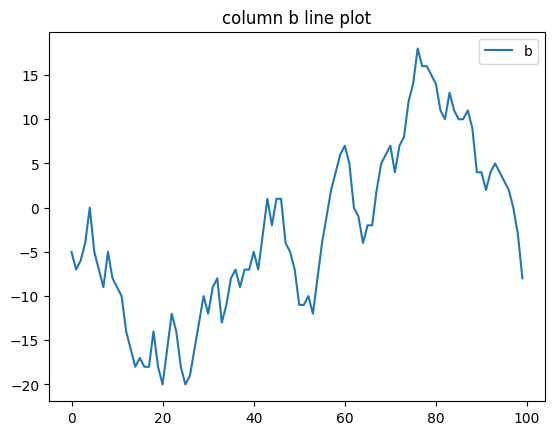

In [51]:
df['b'].plot(title='column b line plot', legend=True)

8.42 plot 方法的 xlim 参数、ylim 参数和 grid 参数

<Axes: >

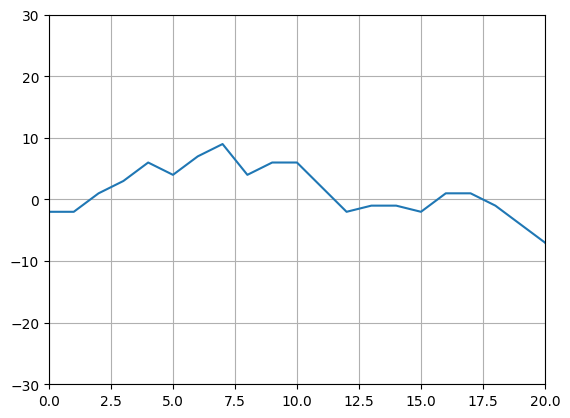

In [52]:
df['c'].plot(grid=True, xlim=(0,20), ylim=(-30,30))

8.43 plot 方法的 xticks 参数

<Axes: >

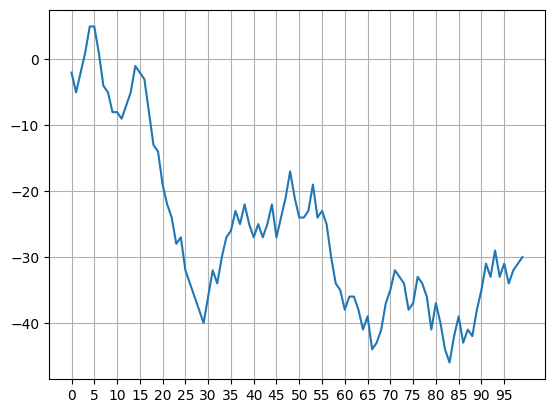

In [53]:
df['d'].plot(xticks=np.arange(0,100,5), grid=True)

8.44 plot 方法的 figsize 参数

<Axes: >

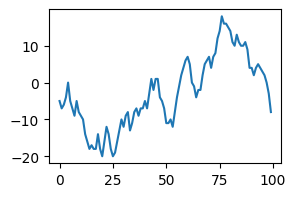

In [54]:
df['b'].plot(figsize=(3,2))

8.45 plot 方法的 subplots 参数

array([<Axes: >, <Axes: >], dtype=object)

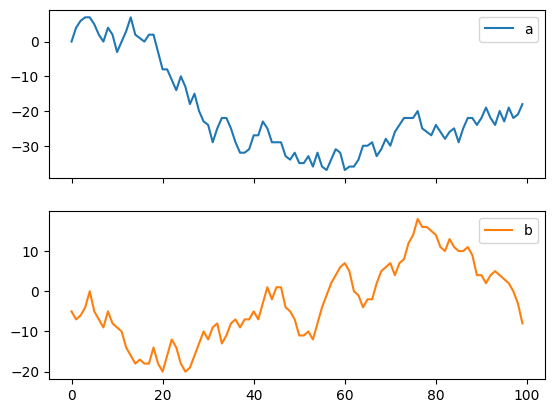

In [55]:
df[['a','b']].plot(subplots=True)

### 8.2.2 条形图

8.46 使用 plot 方法绘制条形图（kind='bar'）

<Axes: >

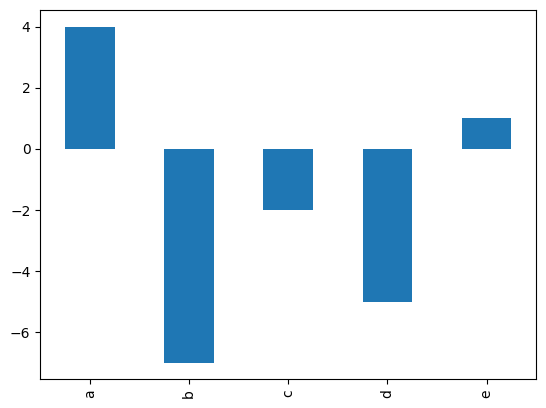

In [56]:
df.iloc[1,:].plot(kind='bar')

8.47 使用 plot 方法绘制条形图（多行）

<Axes: >

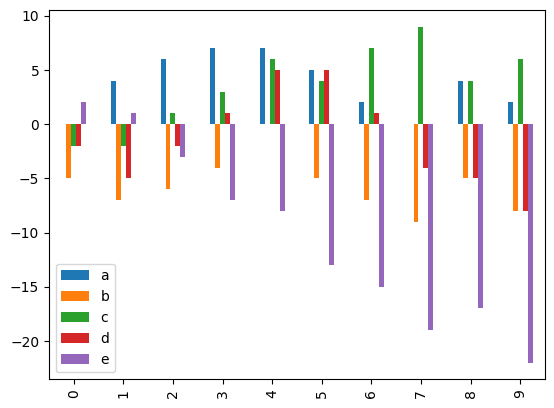

In [57]:
df.iloc[0:10, :].plot(kind='bar')

8.48 plot 方法和 stacked 参数

<Axes: >

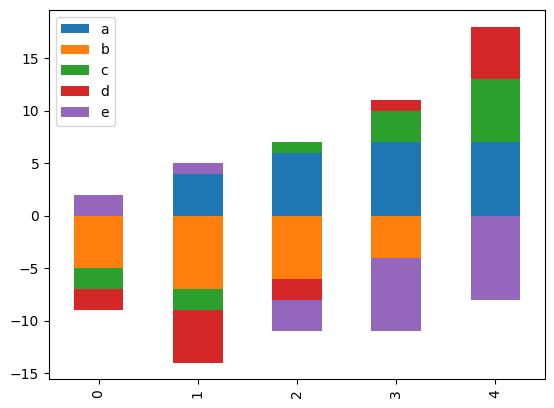

In [58]:
df.iloc[0:5,:].plot(kind='bar', stacked=True)

8.49 使用 plot 方法绘制横向条形图

<Axes: >

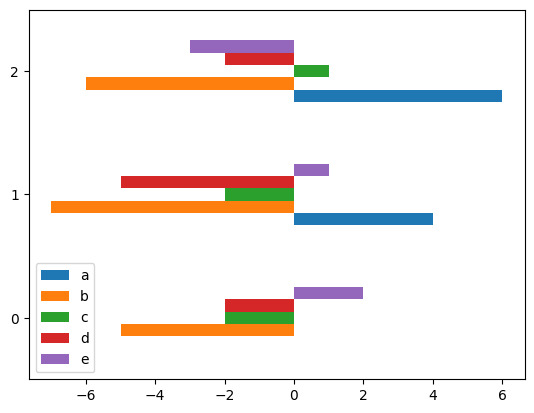

In [59]:
df.iloc[0:3,:].plot(kind='barh')

### 8.2.3 直方图

8.50 adult.csv 文件的读取

In [60]:
usecols = ['age','workclass','education','education.num',
           'marital.status','race','hours.per.week']

adult = pd.read_csv('./data/adult.csv', usecols=usecols)
adult.head(3)

,age,workclass,education,education.num,marital.status,race,hours.per.week
0,90,?,HS-grad,9,Widowed,White,40
1,82,Private,HS-grad,9,Widowed,White,18
2,66,?,Some-college,10,Widowed,Black,40


8.51 使用 plot 方法绘制直方图

<Axes: ylabel='Frequency'>

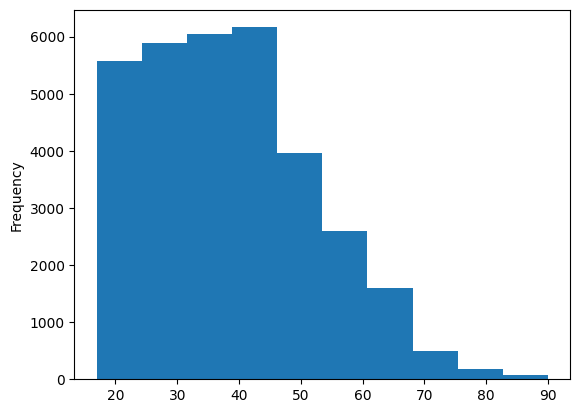

In [61]:
adult['age'].plot(kind='hist', bins=10)

8.52 plot 方法和 bins 参数（kind='hist'）

<Axes: ylabel='Frequency'>

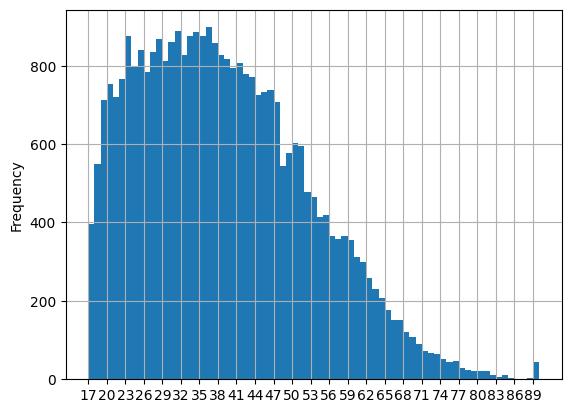

In [62]:
adult['age'].plot(kind='hist',
                  bins=73,
                  xticks=np.arange(17,90,3),
                  grid=True)

8.53 plot 方法和 orientation 参数（kind='hist'）

<Axes: xlabel='Frequency'>

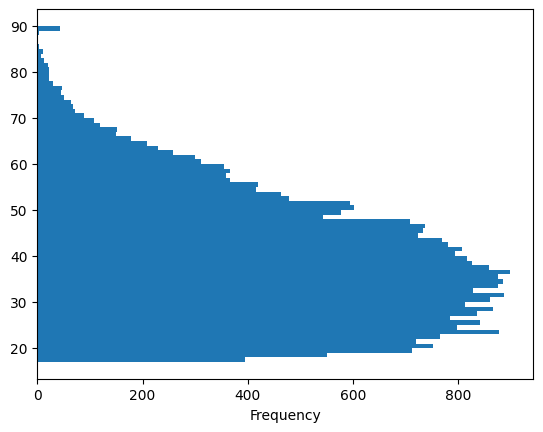

In [63]:
adult['age'].plot(kind='hist', bins=73, orientation='horizontal')

8.54 plot 方法和 cumulative 参数（kind='hist'）

<Axes: ylabel='Frequency'>

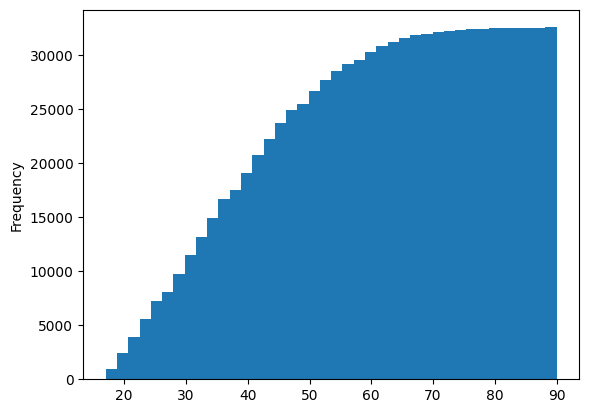

In [64]:
adult['age'].plot(kind='hist', cumulative=True,bins=40)

### 8.2.4 散点图

8.55 使用 plot 方法绘制散点图（kind='scatter'）

<Axes: xlabel='age', ylabel='hours.per.week'>

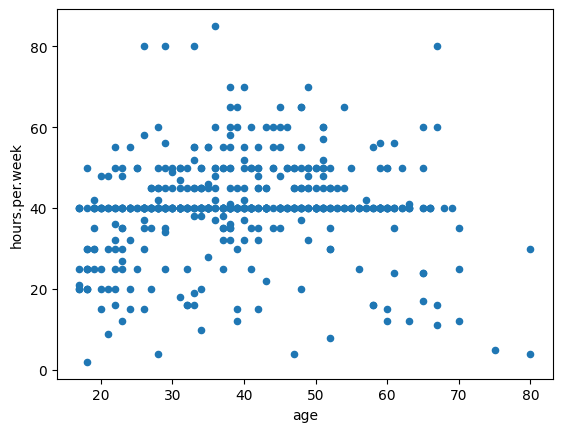

In [65]:
adult.sample(500, random_state=0).plot(kind='scatter',
                                       x='age',
                                       y='hours.per.week')

8.56 plot 方法和 marker 参数（kind='scatter'）

<Axes: xlabel='age', ylabel='hours.per.week'>

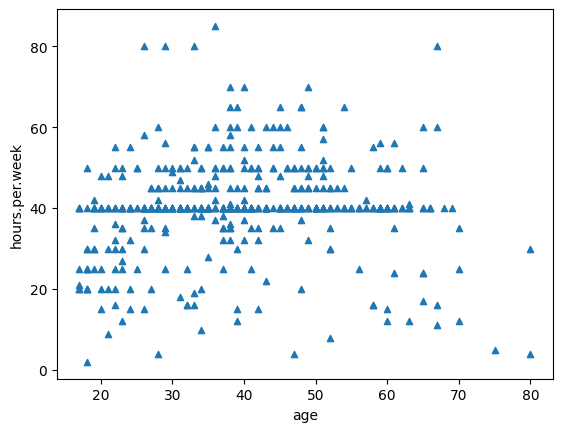

In [66]:
adult.sample(500, random_state=0).plot(kind='scatter',
                                       x='age',
                                       y='hours.per.week',
                                       marker='^')

8.57 plot 方法和 ax 参数（kind='scatter'）

<Axes: xlabel='age', ylabel='hours.per.week'>

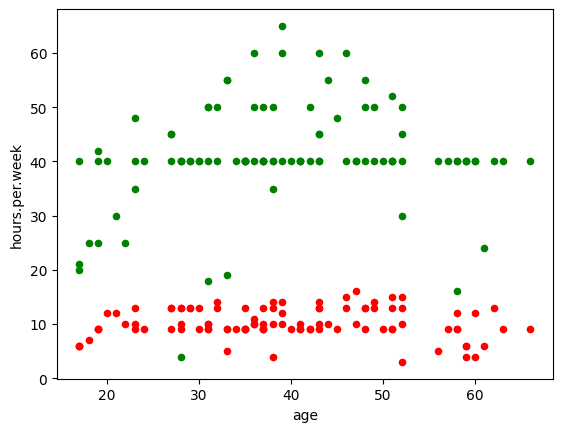

In [67]:
sub = adult.sample(100, random_state=0)
ax = sub.plot(kind='scatter',x='age',y='education.num',color='r')
sub.plot(kind='scatter',x='age',y='hours.per.week', color='g', ax=ax)

### 8.2.5 饼状图

8.58 使用 value_counts 方法计算职业分类列元素的频率

In [68]:
adult['workclass'].value_counts()[0:5]

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Name: count, dtype: int64

8.59 使用 plot 方法绘制饼形图（kind='pie'）

<Axes: ylabel='count'>

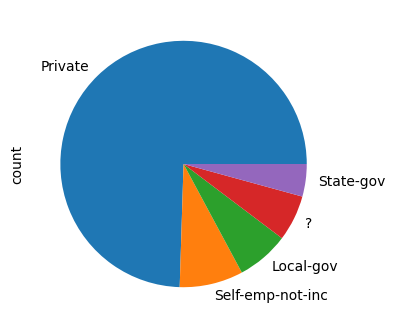

In [69]:
adult['workclass'].value_counts()[0:5].plot(kind='pie', figsize=(4,4))

8.60 plot 方法和 autopct 参数（kind='pie'）

<Axes: ylabel='count'>

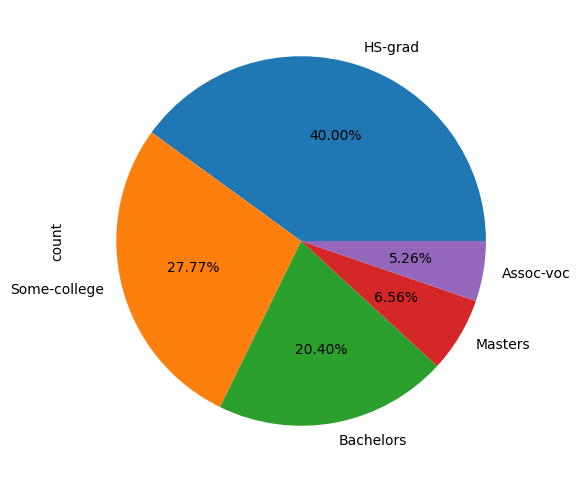

In [70]:
adult['education'].value_counts()[0:5].plot(kind='pie',
                                                 figsize=(6,6),
                                                 autopct='%.2f%%')

8.61 plot 方法和 explode 参数（kind='pie'）

<Axes: ylabel='count'>

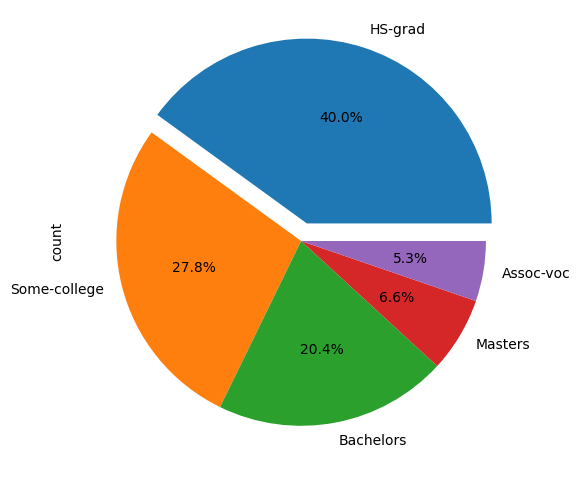

In [71]:
adult['education'].value_counts()[0:5].plot(kind='pie',
                                            explode=[0.1,0,0,0,0],
                                            figsize=(6,6),
                                            autopct='%1.1f%%')

8.62 groupby 方法和 plot 方法（kind='pie'）

In [72]:
grouped = adult.groupby(['marital.status','race'])
cnt = grouped.size().sort_values(ascending=False)[0:5]
cnt

marital.status      race 
Married-civ-spouse  White    13410
Never-married       White     8757
Divorced            White     3797
Never-married       Black     1346
Married-civ-spouse  Black      837
dtype: int64

<Axes: >

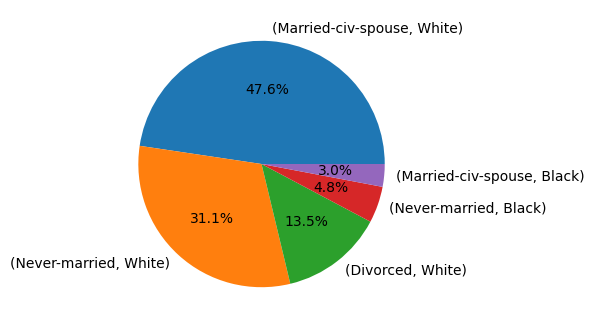

In [73]:
cnt.plot(kind='pie', figsize=(4,4), autopct='%1.1f%%')

### 8.2.6 箱型图

8.63 使用 plot 方法绘制箱形图（kind='box'）

<Axes: >

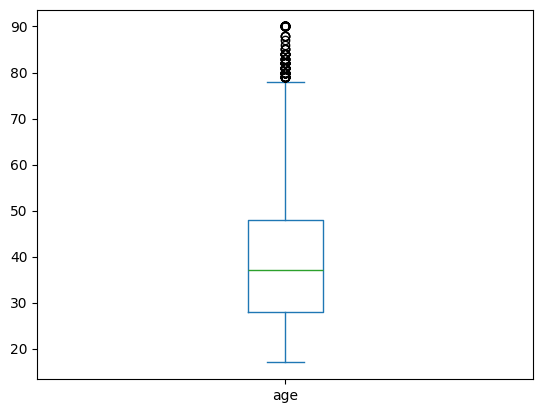

In [74]:
adult['age'].plot(kind='box')

8.64 plot 方法和 subplots 参数（kind='box'）

age                 Axes(0.125,0.11;0.352273x0.77)
education.num    Axes(0.547727,0.11;0.352273x0.77)
dtype: object

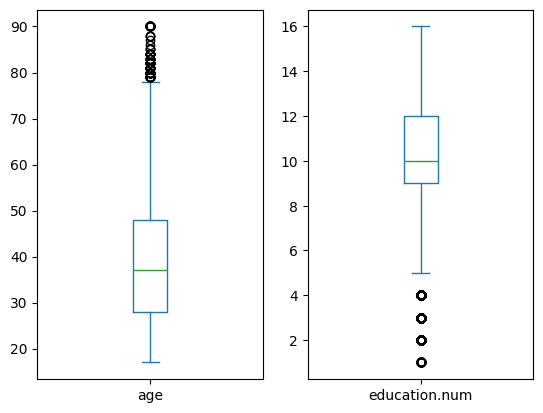

In [75]:
adult[['age','education.num']].plot(kind='box', subplots=True)

8.65 plot 方法和 whis 参数（kind='box'）

<Axes: >

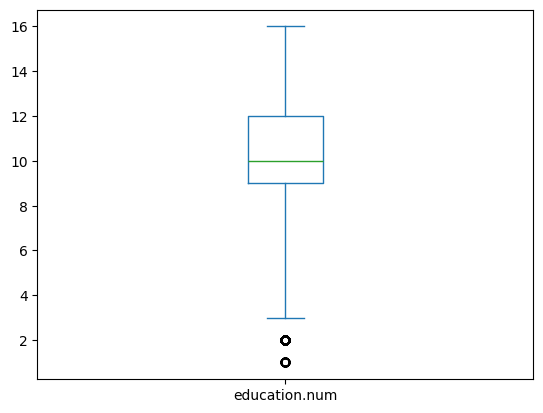

In [76]:
adult['education.num'].plot(kind='box', whis=2.0)

8.66 plot 方法的 showmeans 参数和 vert 参数（kind='box'）

<Axes: >

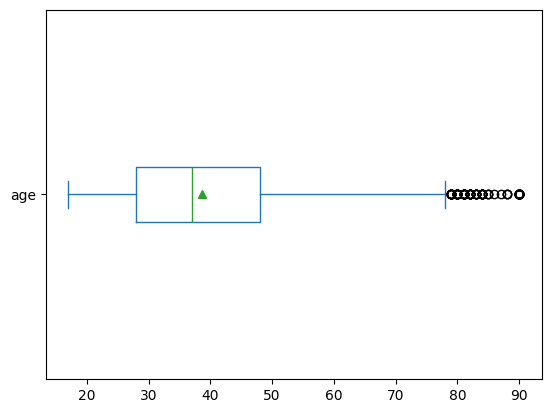

In [77]:
adult['age'].plot(kind='box', showmeans=True, vert=False)

### 8.2.7 散点图矩阵

8.67 pd.plotting 模块的 scatter_matrix 方法

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='education.num', ylabel='age'>,
        <Axes: xlabel='hours.per.week', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='education.num'>,
        <Axes: xlabel='education.num', ylabel='education.num'>,
        <Axes: xlabel='hours.per.week', ylabel='education.num'>],
       [<Axes: xlabel='age', ylabel='hours.per.week'>,
        <Axes: xlabel='education.num', ylabel='hours.per.week'>,
        <Axes: xlabel='hours.per.week', ylabel='hours.per.week'>]],
      dtype=object)

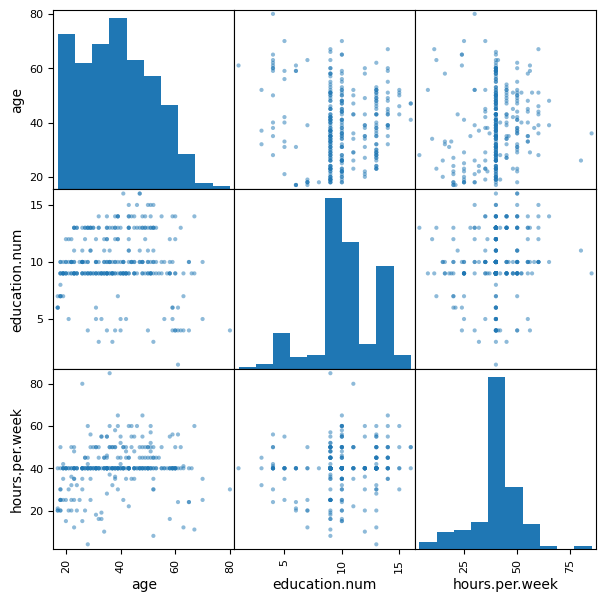

In [78]:
pd.plotting.scatter_matrix(adult.sample(300, random_state=0), figsize=(7,7))

8.68 scatter_matrix方法和diagonal方法

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='hours.per.week', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='hours.per.week'>,
        <Axes: xlabel='hours.per.week', ylabel='hours.per.week'>]],
      dtype=object)

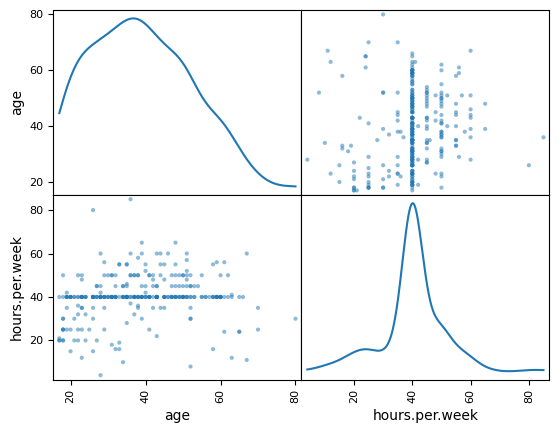

In [79]:
pd.plotting.scatter_matrix(
    adult[['age','hours.per.week']].sample(300, random_state=0),
    diagonal='kde'
)

### 8.2.8 缺失值的处理

8.69 DataFrame对象的创建

In [80]:
np.random.seed(0)
val = np.random.randint(0, 5, size=500).reshape(100,5)
df = pd.DataFrame(val, columns=list('abcde')).cumsum()
df.iloc[20:30,0] = np.nan

8.70 
绘制包含缺失值的折线图（kind='line'）

<Axes: >

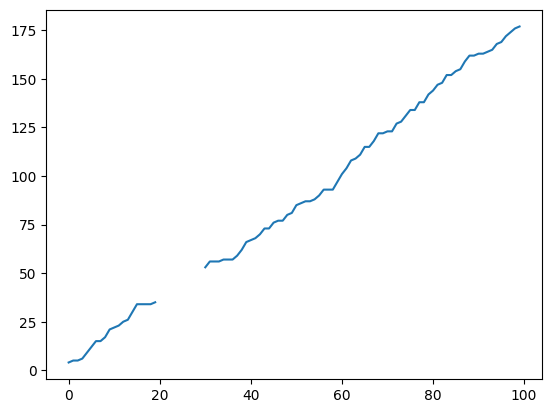

In [81]:
df['a'].plot(kind='line')

8.71 绘制包含缺失值的条形图（kind='bar'）

<Axes: >

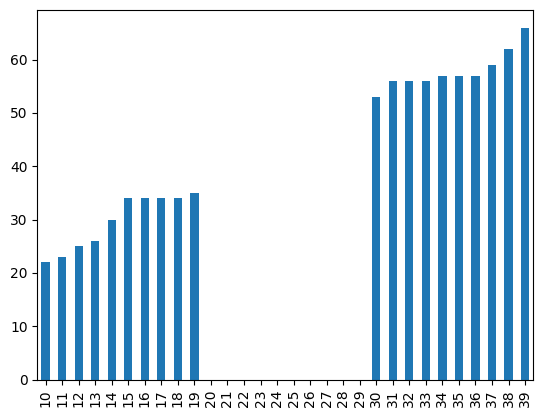

In [82]:
df['a'][10:40].plot(kind='bar')

8.72 绘制包含缺失值的散点图（kind='scatter'）和直方图（kind='hist'）

<Axes: xlabel='b', ylabel='a'>

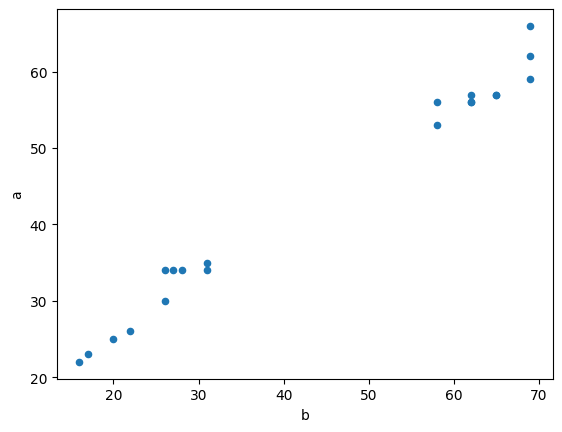

In [83]:
df[10:40].plot(kind='scatter', x='b', y='a')

<Axes: ylabel='Frequency'>

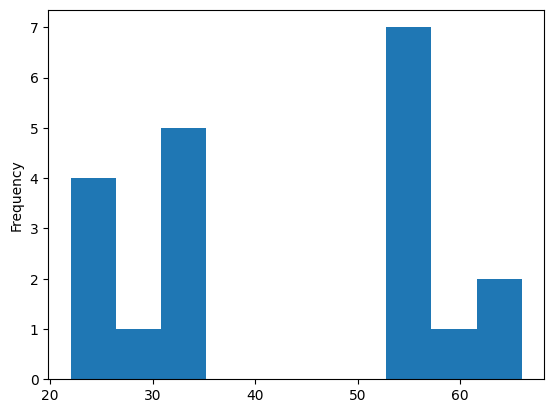

In [84]:
df['a'][10:40].plot(kind='hist')

### 8.3.1 多重索引的基本操作

8.73 DataFrame 对象的创建

In [85]:
name = ['A','B','C','D','E','F','G']
address = ['Tokyo','Tokyo','Tokyo','Tokyo','Osaka','Osaka','Sapporo']
sex = ['F','F','F','M','M','M','M']
div = ['HR','Sales','Marketing','Sales','HR','Marketing','Marketing']
age = [25, 31, 32, 28, 29, 39, 28]
point = [88, 91, 79, 87, 85, 98, 82]

In [86]:
pd.DataFrame({'name':name,
              'address':address,
              'sex':sex,
              'div':div,
              'age':age,
              'point':point})

,name,address,sex,div,age,point
0,A,Tokyo,F,HR,25,88
1,B,Tokyo,F,Sales,31,91
2,C,Tokyo,F,Marketing,32,79
3,D,Tokyo,M,Sales,28,87
4,E,Osaka,M,HR,29,85
5,F,Osaka,M,Marketing,39,98
6,G,Sapporo,M,Marketing,28,82


8.74 元组的创建

In [87]:
tuples = list(zip(address, sex))
tuples

[('Tokyo', 'F'),
 ('Tokyo', 'F'),
 ('Tokyo', 'F'),
 ('Tokyo', 'M'),
 ('Osaka', 'M'),
 ('Osaka', 'M'),
 ('Sapporo', 'M')]

8.75 MultiIndex 对象的创建

In [88]:
midx = pd.MultiIndex.from_tuples(tuples)
midx

MultiIndex([(  'Tokyo', 'F'),
            (  'Tokyo', 'F'),
            (  'Tokyo', 'F'),
            (  'Tokyo', 'M'),
            (  'Osaka', 'M'),
            (  'Osaka', 'M'),
            ('Sapporo', 'M')],
           )

8.76 MultiIndex 对象的 levels 属性和 labels 属性

In [89]:
midx.levels

FrozenList([['Osaka', 'Sapporo', 'Tokyo'], ['F', 'M']])

In [90]:
# midx.labels 
midx.codes

FrozenList([[2, 2, 2, 2, 0, 0, 1], [0, 0, 0, 1, 1, 1, 1]])

8.77 from_tuples 方法和 names 参数

In [91]:
midx = pd.MultiIndex.from_tuples(tuples, names=['address','sex'])
print(midx.names)
midx

['address', 'sex']


MultiIndex([(  'Tokyo', 'F'),
            (  'Tokyo', 'F'),
            (  'Tokyo', 'F'),
            (  'Tokyo', 'M'),
            (  'Osaka', 'M'),
            (  'Osaka', 'M'),
            ('Sapporo', 'M')],
           names=['address', 'sex'])

8.78 MultiIndex 对象和 index 参数

In [92]:
ser = pd.Series(age, index=midx)
print(ser.index)
ser

MultiIndex([(  'Tokyo', 'F'),
            (  'Tokyo', 'F'),
            (  'Tokyo', 'F'),
            (  'Tokyo', 'M'),
            (  'Osaka', 'M'),
            (  'Osaka', 'M'),
            ('Sapporo', 'M')],
           names=['address', 'sex'])


address  sex
Tokyo    F      25
         F      31
         F      32
         M      28
Osaka    M      29
         M      39
Sapporo  M      28
dtype: int64

8.79 多个列表和 index 参数

In [93]:
pd.Series(age, index=[address, sex])

Tokyo    F    25
         F    31
         F    32
         M    28
Osaka    M    29
         M    39
Sapporo  M    28
dtype: int64

8.80 from_product 方法

In [94]:
np.random.seed(0)
temp1 = ['Tokyo','Osaka', 'Sapporo']
temp2 = ['F','M']
midx2 = pd.MultiIndex.from_product([temp1, temp2], names=['address','sex'])
pd.Series(np.random.randint(10,size=6),index=midx2)

address  sex
Tokyo    F      5
         M      0
Osaka    F      3
         M      3
Sapporo  F      7
         M      9
dtype: int32

8.81 DataFrame 对象和 MultiIndex 对象

In [95]:
df = pd.DataFrame({'age':age,'point':point}, index=midx)
df

age  point
address sex            
Tokyo   F     25     88
        F     31     91
        F     32     79
        M     28     87
Osaka   M     29     85
        M     39     98
Sapporo M     28     82

8.82 MultiIndex 对象的列标签

In [96]:
df.T

address Tokyo             Osaka     Sapporo
sex         F   F   F   M     M   M       M
age        25  31  32  28    29  39      28
point      88  91  79  87    85  98      82

8.83 MultiIndex 对象的 from_arrays 方法

In [97]:
midx = pd.MultiIndex.from_arrays([address,sex,div],
                                 names=['address','sex','div'])

df = pd.DataFrame({'age':age,'point':point}, index=midx)
df

age  point
address sex div                  
Tokyo   F   HR          25     88
            Sales       31     91
            Marketing   32     79
        M   Sales       28     87
Osaka   M   HR          29     85
            Marketing   39     98
Sapporo M   Marketing   28     82

8.84 MultiIndex 对象的 nlevels 属性

In [98]:
df.index.nlevels

3

8.85 MultiIndex 对象的 get_level_values 属性

In [99]:
print(df.index.get_level_values('address'))

Index(['Tokyo', 'Tokyo', 'Tokyo', 'Tokyo', 'Osaka', 'Osaka', 'Sapporo'], dtype='object', name='address')


In [100]:
print(df.index.get_level_values(0))

Index(['Tokyo', 'Tokyo', 'Tokyo', 'Tokyo', 'Osaka', 'Osaka', 'Sapporo'], dtype='object', name='address')


8.86 get_level_values 方法和 level 的位置

In [101]:
print(df.index.get_level_values(1))

Index(['F', 'F', 'F', 'M', 'M', 'M', 'M'], dtype='object', name='sex')


In [102]:
print(df.index.get_level_values(-1))

Index(['HR', 'Sales', 'Marketing', 'Sales', 'HR', 'Marketing', 'Marketing'], dtype='object', name='div')


8.87 MultiIndex 对象的 sort_index 方法

In [103]:
df.sort_index(axis=0, ascending=True)

age  point
address sex div                  
Osaka   M   HR          29     85
            Marketing   39     98
Sapporo M   Marketing   28     82
Tokyo   F   HR          25     88
            Marketing   32     79
            Sales       31     91
        M   Sales       28     87

8.88 sort_index 方法的 level 参数和 sort_remaining 参数（False）

In [104]:
df.sort_index(axis=0, level=1, sort_remaining=False)

age  point
address sex div                  
Tokyo   F   HR          25     88
            Sales       31     91
            Marketing   32     79
        M   Sales       28     87
Osaka   M   HR          29     85
            Marketing   39     98
Sapporo M   Marketing   28     82

8.89 sort_index 方法的 level 参数和 sort_remaining 参数（True）

In [105]:
df.sort_index(axis=0, level=1, sort_remaining=True)

age  point
address sex div                  
Tokyo   F   HR          25     88
            Marketing   32     79
            Sales       31     91
Osaka   M   HR          29     85
            Marketing   39     98
Sapporo M   Marketing   28     82
Tokyo   M   Sales       28     87

8.90 sort_index 方法的 level 参数（多个）

In [106]:
df.sort_index(level=['sex','div'], sort_remaining=False)

age  point
address sex div                  
Tokyo   F   HR          25     88
            Marketing   32     79
            Sales       31     91
Osaka   M   HR          29     85
            Marketing   39     98
Sapporo M   Marketing   28     82
Tokyo   M   Sales       28     87

8.91 多重索引的索引引用（PerformanceWarning）

In [107]:
df.loc['Tokyo', 'F']

C:\Users\liye\AppData\Local\Temp\ipykernel_8236\2532038969.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc['Tokyo', 'F']


,age,point
div,,
HR,25,88
Sales,31,91
Marketing,32,79


8.92 多重索引的索引引用

In [108]:
df.sort_index(level=['address','sex']).loc['Tokyo','F']

,age,point
div,,
HR,25,88
Marketing,32,79
Sales,31,91


8.93 多重索引和切片（UnsortedIndexError）

In [109]:
# df.loc['Osaka':'Sapporo']

8.94 多重索引和切片

In [110]:
df.sort_index(level=0).loc['Osaka':'Sapporo']

age  point
address sex div                  
Osaka   M   HR          29     85
            Marketing   39     98
Sapporo M   Marketing   28     82

8.95 MultiIndex 对象的 is_lexsorted 方法

8.96 MultiIndex 对象的引用 [ 方括号（[ ]）]

In [111]:
df_col = df.T.copy()
df_col

address Tokyo                       Osaka             Sapporo
sex         F                     M     M                   M
div        HR Sales Marketing Sales    HR Marketing Marketing
age        25    31        32    28    29        39        28
point      88    91        79    87    85        98        82

In [112]:
df_col['Tokyo']

sex     F                     M
div    HR Sales Marketing Sales
age    25    31        32    28
point  88    91        79    87

8.97 引用 MultiIndex 对象的多个层次

In [113]:
df_col['Tokyo']['M']

div,Sales
age,28
point,87


8.98 引用 MultiIndex 对象的所有层次

In [114]:
df_col['Osaka']['M']['HR']

age      29
point    85
Name: HR, dtype: int64

8.99 多重索引和 loc 属性

In [115]:
df.loc['Tokyo']

age  point
sex div                  
F   HR          25     88
    Sales       31     91
    Marketing   32     79
M   Sales       28     87

8.100 多重索引和切片

In [116]:
df.sort_index(level=0, inplace=True)
df.loc['Osaka':'Sapporo']

age  point
address sex div                  
Osaka   M   HR          29     85
            Marketing   39     98
Sapporo M   Marketing   28     82

8.101 多重索引和元组的切片①

In [117]:
df.loc[('Sapporo','M'):('Tokyo','F')]

age  point
address sex div                  
Sapporo M   Marketing   28     82
Tokyo   F   HR          25     88
            Marketing   32     79
            Sales       31     91

8.102 多重索引和元组的切片②

In [118]:
df

age  point
address sex div                  
Osaka   M   HR          29     85
            Marketing   39     98
Sapporo M   Marketing   28     82
Tokyo   F   HR          25     88
            Marketing   32     79
            Sales       31     91
        M   Sales       28     87

In [119]:
df.loc[[('Sapporo','M','Marketing'),
        # ('Sapporo','F','Marketing'),
        ('Tokyo','F','Marketing'),]]

,,,age,point
address,sex,div,,
Sapporo,M,Marketing,28,82
Tokyo,F,Marketing,32,79


8.103 DataFrame 对象的 xs 方法

In [120]:
df.xs(key='Tokyo')

age  point
sex div                  
F   HR          25     88
    Marketing   32     79
    Sales       31     91
M   Sales       28     87

8.104 xs 方法的 level 参数

In [121]:
df.xs(key='Marketing', level='div')

,,age,point
address,sex,,
Osaka,M,39,98
Sapporo,M,28,82
Tokyo,F,32,79


8.105 xs 方法的 drop_level 参数

In [122]:
df.xs(key='Marketing', level='div', drop_level=False)

,,,age,point
address,sex,div,,
Osaka,M,Marketing,39,98
Sapporo,M,Marketing,28,82
Tokyo,F,Marketing,32,79


8.106 使用 xs 方法的多个键进行引用

In [123]:
df.xs(key=('M','Marketing'), level=('sex','div'), drop_level=False)

,,,age,point
address,sex,div,,
Osaka,M,Marketing,39,98
Sapporo,M,Marketing,28,82


8.107 使用 xs 方法的列标签进行引用

In [124]:
df_col.xs(key='Sales', axis=1, level=-1, drop_level=False)

address Tokyo      
sex         F     M
div     Sales Sales
age        31    28
point      91    87

8.108 MultiIndex 对象的 set_levels 方法

In [125]:
df2 = df.copy()
df2.index = df2.index.set_levels(levels=['大阪','札幌','东京'],level=0)
df2

age  point
address sex div                  
大阪      M   HR          29     85
            Marketing   39     98
札幌      M   Marketing   28     82
东京      F   HR          25     88
            Marketing   32     79
            Sales       31     91
        M   Sales       28     87

8.109 set_levels 方法的 levels 参数和 level 参数

In [126]:
df2.index = df2.index.set_levels(
    levels=[['女','男'],['人事','市场','销售']],
    level=['sex','div'])

df2

age  point
address sex div            
大阪      男   人事    29     85
            市场    39     98
札幌      男   市场    28     82
东京      女   人事    25     88
            市场    32     79
            销售    31     91
        男   销售    28     87

8.110 MultiIndex 对象的 levels 属性和 labels 属性

In [127]:
print(df2.index.levels[0])

df2

Index(['大阪', '札幌', '东京'], dtype='object', name='address')


age  point
address sex div            
大阪      男   人事    29     85
            市场    39     98
札幌      男   市场    28     82
东京      女   人事    25     88
            市场    32     79
            销售    31     91
        男   销售    28     87

8.111 MultiIndex 对象的 set_labels 方法

8.112 DataFrame 对象的 swaplevel 方法

In [128]:
df2.swaplevel(i='sex', j='address')

age  point
sex address div            
男   大阪      人事    29     85
            市场    39     98
    札幌      市场    28     82
女   东京      人事    25     88
            市场    32     79
            销售    31     91
男   东京      销售    28     87

8.113 DataFrame 对象的 reset_index 方法

In [129]:
df2 = df2.reset_index()
df2

,address,sex,div,age,point
0,大阪,男,人事,29,85
1,大阪,男,市场,39,98
2,札幌,男,市场,28,82
3,东京,女,人事,25,88
4,东京,女,市场,32,79
5,东京,女,销售,31,91
6,东京,男,销售,28,87


8.114 DataFrame 对象的 set_index 方法

In [130]:
df2.set_index(['address','sex','div'])

age  point
address sex div            
大阪      男   人事    29     85
            市场    39     98
札幌      男   市场    28     82
东京      女   人事    25     88
            市场    32     79
            销售    31     91
        男   销售    28     87

### 8.3.2 多重索引的统计

8.115 DataFrame 对象的 mean 方法（axis=0）

In [131]:
df.mean(axis=0)

age      30.285714
point    87.142857
dtype: float64

8.116 DataFrame 对象的 mean 方法（axis=1）

In [132]:
df.mean(axis=1)

address  sex  div      
Osaka    M    HR           57.0
              Marketing    68.5
Sapporo  M    Marketing    55.0
Tokyo    F    HR           56.5
              Marketing    55.5
              Sales        61.0
         M    Sales        57.5
dtype: float64

8.117 mean 方法的 level 参数

In [133]:
df

age  point
address sex div                  
Osaka   M   HR          29     85
            Marketing   39     98
Sapporo M   Marketing   28     82
Tokyo   F   HR          25     88
            Marketing   32     79
            Sales       31     91
        M   Sales       28     87

In [134]:
df['age'].mean(axis=0)

30.285714285714285

8.118 mean 方法的 level 参数（多个）

8.119 goupby 方法的 level 参数

In [135]:
grouped = df.groupby(level='sex')
grouped.mean()

,age,point
sex,,
F,29.333333,86.0
M,31.000000,88.0


In [136]:
df.mean()

age      30.285714
point    87.142857
dtype: float64

8.120 groupby 方法的 level 参数（多个）

In [137]:
df['point'].groupby(level=['sex','div']).max()

sex  div      
F    HR           88
     Marketing    79
     Sales        91
M    HR           85
     Marketing    98
     Sales        87
Name: point, dtype: int64

8.121 基于层和列的分组

In [138]:
df.groupby(by=['sex','age']).min()

point
sex age       
F   25      88
    31      91
    32      79
M   28      82
    29      85
    39      98

8.122 Grouper 函数

In [139]:
grouper = pd.Grouper(level=1)
df.groupby(by=[grouper,'age']).min()

point
sex age       
F   25      88
    31      91
    32      79
M   28      82
    29      85
    39      98

### 8.3.3 多重索引的连接与合并

8.123 DataFrame 对象的创建

In [140]:
val = {'A':['a0','a1','a2'],'B':['b0','b1','b2']}
idx = pd.Index(['s0','s1','s2'],name='1st')
single = pd.DataFrame(val, index=idx)
single

,A,B
1st,,
s0,a0,b0
s1,a1,b1
s2,a2,b2


In [141]:
val_idx = [['s0','s1','s2','s3'],['m0','m1','m2','m3']]
midx = pd.MultiIndex.from_arrays(val_idx,names=['1st','2nd'])
val_df = {'C':['c0','c1','c2','c3'],'D':['d0','d1','d2','d3']}
multi = pd.DataFrame(val_df, index=midx)
multi

,,C,D
1st,2nd,,
s0,m0,c0,d0
s1,m1,c1,d1
s2,m2,c2,d2
s3,m3,c3,d3


8.124 DataFrame 对象的 join 方法

In [142]:
single.join(multi, how='outer')

,,A,B,C,D
1st,2nd,,,,
s0,m0,a0,b0,c0,d0
s1,m1,a1,b1,c1,d1
s2,m2,a2,b2,c2,d2
s3,m3,NaN,NaN,c3,d3


8.125 merge 函数

In [143]:
pd.merge(single.reset_index(),
         multi.reset_index(),
         on='1st', how='outer').set_index(['1st', '2nd'])

,,A,B,C,D
1st,2nd,,,,
s0,m0,a0,b0,c0,d0
s1,m1,a1,b1,c1,d1
s2,m2,a2,b2,c2,d2
s3,m3,NaN,NaN,c3,d3


8.126 DataFrame 对象的创建

In [144]:
idx_val = [['s0','s1','s2','s4'], ['p0','p1','p2','p4']]
midx = pd.MultiIndex.from_arrays(idx_val, names=['1st','3rd'])
df_val = {'E':['e0','e1','e2','e3'],'F':['f0','f1','f2','f3']}
multi2 = pd.DataFrame(df_val, index=midx,)
multi2

,,E,F
1st,3rd,,
s0,p0,e0,f0
s1,p1,e1,f1
s2,p2,e2,f2
s4,p4,e3,f3


8.127 merge函数

In [145]:
pd.merge(multi.reset_index(), 
         multi2.reset_index(),
         on='1st',
         how='outer').set_index(['1st','2nd','3rd'])

,,,C,D,E,F
1st,2nd,3rd,,,,
s0,m0,p0,c0,d0,e0,f0
s1,m1,p1,c1,d1,e1,f1
s2,m2,p2,c2,d2,e2,f2
s3,m3,NaN,c3,d3,NaN,NaN
s4,NaN,p4,NaN,NaN,e3,f3


## 8.4 时间序列数据

### 8.4.1 datetime模块

8.128 : datetime 模块

In [146]:
import datetime

8.129 : datetime 对象

In [147]:
dt = datetime.datetime(year=2019,month=5,day=1,hour=10,minute=0,second=15)
dt

datetime.datetime(2019, 5, 1, 10, 0, 15)

In [148]:
print(type(dt))

<class 'datetime.datetime'>


8.130 : datetime 对象的 today 方法

In [149]:
dtt = datetime.datetime.today()
dtt

datetime.datetime(2023, 10, 1, 18, 22, 31, 686946)

8.131 :datetime 对象的属性

In [150]:
print(dt.year,dt.month,dt.day,dt.hour,dt.minute,dt.second,dt.microsecond)

2019 5 1 10 0 15 0


8.132 :datetime 对象的 date 方法

In [151]:
d = dt.date()
d

datetime.date(2019, 5, 1)

In [152]:
print(type(d))

<class 'datetime.date'>


8.133 :date 对象

In [153]:
datetime.date(year=2019,month=2,day=1)

datetime.date(2019, 2, 1)

8.134 : date 对象的 today 方法和 min 属性、max 属性

In [154]:
print(datetime.date.today())
print(datetime.date.min)
print(datetime.date.max)

2023-10-01
0001-01-01
9999-12-31


8.135 : datetime 对象的 time 方法

In [155]:
t = dt.time()
print(type(t))
print(t)

<class 'datetime.time'>
10:00:15


8.136 : time 对象

In [156]:
datetime.time(hour=15,minute=45,second=20)

datetime.time(15, 45, 20)

8.137 : timedelta 对象

In [157]:
delta = datetime.timedelta(days=1, hours=5)
print(type(delta))
print(delta)
delta

<class 'datetime.timedelta'>
1 day, 5:00:00


datetime.timedelta(days=1, seconds=18000)

8.138 : datetime对象之间的减法运算

In [158]:
delta=dt-datetime.datetime(2019,5,25,19,0,0)
delta

datetime.timedelta(days=-25, seconds=54015)

8.139 : timedelta 对象的属性

In [159]:
print(delta.days)
print(delta.seconds)
print(delta.microseconds)

-25
54015
0


8.140 : datetime 对象和 timedelta 对象

In [160]:
delta = datetime.timedelta(days=1, hours=10)
print(dt)
print(dt + delta)

2019-05-01 10:00:15
2019-05-02 20:00:15


### 8.4.2 使用datetime对象创建Timestamp对象

8.141 : 使用 datetime 对象创建 Timestamp 对象

In [161]:
ts = pd.Timestamp(datetime.datetime(2019,4,1,15,20,45,900))
ts

Timestamp('2019-04-01 15:20:45.000900')

In [162]:
print(type(ts))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


8.142 : 使用字符串创建 Timestamp 对象

In [163]:
print(pd.Timestamp('20190402'))
print(pd.Timestamp('2019/4/2 19:00'))

2019-04-02 00:00:00
2019-04-02 19:00:00


8.143 : Timestamp 对象的属性

In [164]:
print(ts.year,ts.month,ts.day,ts.hour,ts.minute,ts.second,ts.microsecond)

2019 4 1 15 20 45 900


8.144 : Timestamp 对象的 week 属性、dayofweek 属性和 weekday_name 属性

In [165]:
# ts.week, ts.dayofweek, ts.weekday_name
(ts.week, ts.dayofweek, ts.weekday)

(14,
 0,
 <bound method Timestamp.weekday of Timestamp('2019-04-01 15:20:45.000900')>)

8.145 : Timestamp 对象的 replace 方法

In [166]:
ts.replace(year=2020, month=8, second=30)

Timestamp('2020-08-01 15:20:30.000900')

8.146 :Timestamp 对象的 round 方法（向上取整）

In [167]:
ts.round(freq='D')

Timestamp('2019-04-02 00:00:00')

8.147 :Timestamp 对象的 round 方法（向下取整）

In [168]:
ts.replace(hour=11, minute=59).round(freq='D')

Timestamp('2019-04-01 00:00:00')

8.148 : to_pydatetime 方法和 to_datetime64 方法

In [169]:
print(ts.to_pydatetime(), type(ts.to_pydatetime()))
print(ts.to_datetime64(), type(ts.to_datetime64()))

2019-04-01 15:20:45.000900 <class 'datetime.datetime'>
2019-04-01T15:20:45.000900 <class 'numpy.datetime64'>


8.149 :DatetimeIndex 对象

In [170]:
days = [datetime.datetime(2019,1,1), datetime.datetime(2019,1,1),
        datetime.datetime(2019,1,2), None]

In [171]:
didx = pd.DatetimeIndex(days)
didx

DatetimeIndex(['2019-01-01', '2019-01-01', '2019-01-02', 'NaT'], dtype='datetime64[ns]', freq=None)

8.150 : Index 构造函数和 datetime 对象

In [172]:
print(pd.Index(['2019-01-01','2019-01-02']))
print(pd.Index(days))

Index(['2019-01-01', '2019-01-02'], dtype='object')
DatetimeIndex(['2019-01-01', '2019-01-01', '2019-01-02', 'NaT'], dtype='datetime64[ns]', freq=None)


8.151 : DatetimeIndex对象的构造函数和参数

In [173]:
# pd.DatetimeIndex(start='20190101', end='20190105', freq='D')

8.152 : DatetimeIndex 构造函数和 periods 参数

In [174]:
# pd.DatetimeIndex(start='20190101', periods=5, freq='W-SUN')

8.153 : date_range 函数

In [175]:
pd.date_range(start='20190101', periods=5)

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05'],
              dtype='datetime64[ns]', freq='D')

8.154 : bdate_range 函数

In [176]:
pd.bdate_range(start='2019-01-01', periods=5)

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07'],
              dtype='datetime64[ns]', freq='B')

8.155 : Series 对象和 DatetimeIndex 对象

In [177]:
pd.Series(np.arange(len(didx)), index=didx)

2019-01-01    0
2019-01-01    1
2019-01-02    2
NaT           3
dtype: int32

8.156 Series Period对象

In [178]:
p = pd.Period('20190101', freq='D')
p

Period('2019-01-01', 'D')

8.157 :Period 对象的 start_time、end_time 属性

In [179]:
print(p.start_time)
print(p.end_time)

2019-01-01 00:00:00
2019-01-01 23:59:59.999999999


8.158 : Period 对象的频率（freq='M'）

In [180]:
p = pd.Period('2019-02', freq='M')
print(p)
print(p.start_time)
print(p.end_time)

2019-02
2019-02-01 00:00:00
2019-02-28 23:59:59.999999999


8.159 : Period 对象的频率（freq='3D'）

In [181]:
p = pd.Period('2019-01-01', freq='3D')
print(p)
print(p.start_time)
print(p.end_time)

2019-01-01
2019-01-01 00:00:00
2019-01-03 23:59:59.999999999


8.160 : Period 对象和整数的运算

In [182]:
p = pd.Period('20190305', freq='5D')
print(p)
print(p + 3)
print(p - 2)

2019-03-05
2019-03-20
2019-02-23


8.161 :Period 对象和 timedelta 对象

In [183]:
p = pd.Period('20190405 11:00', freq='H')
print(p)
print(p + datetime.timedelta(hours=5))
print(p + datetime.timedelta(hours=-2))

2019-04-05 11:00
2019-04-05 16:00
2019-04-05 09:00


8.162 :Period 对象之间的运算

In [184]:
p2 = pd.Period('2019-04-05 17:00', freq='H')
p - p2

<-6 * Hours>

8.163 : DatetimeIndex 对象和 PeriodIndex 对象

In [185]:
timestamps = [pd.Timestamp('20190401'), pd.Timestamp('20190402')]
pd.Index(timestamps)

DatetimeIndex(['2019-04-01', '2019-04-02'], dtype='datetime64[ns]', freq=None)

In [186]:
periods = [pd.Period('201904', freq='M'), pd.Period('201905', freq='M')]
pd.Index(periods)

PeriodIndex(['2019-04', '2019-05'], dtype='period[M]')

8.164 : PeriodIndex 对象的构造函数

In [187]:
years = ['2017', '2018', '2019'] 
pidx = pd.PeriodIndex(years, freq='A-DEC')
pidx

PeriodIndex(['2017', '2018', '2019'], dtype='period[A-DEC]')

8.165 : 构造函数的 start 参数和 periods 参数

In [188]:
# pd.PeriodIndex(start='2019-Apr', periods=5, freq='M')

8.166 : period_range 函数

In [189]:
pd.period_range(start='20190401', periods=5, freq='5D')

PeriodIndex(['2019-04-01', '2019-04-06', '2019-04-11', '2019-04-16',
             '2019-04-21'],
            dtype='period[5D]')

8.167 : PeriodIndex 对象的 asfreq 方法

In [190]:
print(pidx)
print(pidx.asfreq('D'))

PeriodIndex(['2017', '2018', '2019'], dtype='period[A-DEC]')
PeriodIndex(['2017-12-31', '2018-12-31', '2019-12-31'], dtype='period[D]')


8.168 : Series 对象和 PeriodIndex 对象

In [191]:
ser = pd.Series([1,2,3], index=pidx)
ser

2017    1
2018    2
2019    3
Freq: A-DEC, dtype: int64

8.169 : DateOffset 对象的 Hour 类

In [192]:
# pd.DatetimeIndex(start='20190501 17:00', periods=5, freq='H')

In [193]:
from pandas.tseries.offsets import Hour
# pd.DatetimeIndex(start='20190501 17:00', periods=5, freq=Hour())

8.170 :Timestamp 对象和 DateOffset 对象

In [194]:
ts = pd.Timestamp('20190502 14:00')
print(ts)
print(ts - Hour())
print(ts + Hour())

2019-05-02 14:00:00
2019-05-02 13:00:00
2019-05-02 15:00:00


8.171:DateOffset 对象的乘法

In [195]:
# pd.DatetimeIndex(start='20190501 17:00', periods=5, freq=5 * Hour())

8.172 : DateOffset 对象和字符串

In [196]:
# pd.DatetimeIndex(start='20190501 17:00', periods=5, freq='5H')

8.173 : Hour 类和 Minute 类

In [197]:
from pandas.tseries.offsets import Hour, Minute
hours_minutes = 3 * Hour() + 20 * Minute()
hours_minutes

<200 * Minutes>

In [198]:
# pd.DatetimeIndex(start='20190501 17:00', periods=5, freq=hours_minutes)

8.174 : DateOffset 对象和频率的字符串

In [199]:
# pd.DatetimeIndex(start='20190501 17:00', periods=5, freq='3h20min')

8.175 : 表示年末的字符串和 YearEnd 类

In [200]:
# pd.DatetimeIndex(start='20110501', periods=2, freq='A-DEC')

In [201]:
from pandas.tseries.offsets import YearEnd
# pd.DatetimeIndex(start='20110501', periods=2, freq=YearEnd())

8.176 : 表示年初的字符串和 YearBegin 类

In [202]:
# pd.DatetimeIndex(start='20110501', periods=2, freq='AS-JAN')

In [203]:
# from pandas.tseries.offsets import YearBegin
# pd.DatetimeIndex(start='20110501', periods=2, freq=YearBegin())

### 8.4.3 时间序列数据的索引引用

8.177 : Series 对象和 DatetimeIndex 对象

In [204]:
rng = pd.date_range(start='20181225', end='20190105', freq='D')
ser = pd.Series(np.arange(len(rng)), index=rng)
ser

2018-12-25     0
2018-12-26     1
2018-12-27     2
2018-12-28     3
2018-12-29     4
2018-12-30     5
2018-12-31     6
2019-01-01     7
2019-01-02     8
2019-01-03     9
2019-01-04    10
2019-01-05    11
Freq: D, dtype: int32

8.178 : 使用方括号（[ ]）和切片进行索引引用

In [205]:
ser[2]

C:\Users\liye\AppData\Local\Temp\ipykernel_8236\3656152456.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ser[2]


2

In [206]:
ser[::2]

2018-12-25     0
2018-12-27     2
2018-12-29     4
2018-12-31     6
2019-01-02     8
2019-01-04    10
Freq: 2D, dtype: int32

8.179 : DatetimeIndex 对象和字符串

In [207]:
ser['2018']

2018-12-25    0
2018-12-26    1
2018-12-27    2
2018-12-28    3
2018-12-29    4
2018-12-30    5
2018-12-31    6
Freq: D, dtype: int32

In [208]:
ser['2019-1']

2019-01-01     7
2019-01-02     8
2019-01-03     9
2019-01-04    10
2019-01-05    11
Freq: D, dtype: int32

8.180 : 使用 datetime 类型和 date 类型进行索引引用

In [209]:
ser[datetime.datetime(2018,12,31)]

6

In [210]:
# ser[datetime.date(2019,1,2)]

8.181 :使用字符串和切片进行索引引用（Series 对象）

In [211]:
ser['2018-12-29':'2019-1-2']

2018-12-29    4
2018-12-30    5
2018-12-31    6
2019-01-01    7
2019-01-02    8
Freq: D, dtype: int32

8.182 : DataFrame 对象的创建

In [212]:
rng = pd.date_range('20190101 00:00:00', '20190330 00:00:00', freq='h')
df = pd.DataFrame(np.arange(len(rng) * 3).reshape(len(rng), 3), index=rng)
df.head()

,0,1,2
2019-01-01 00:00:00,0,1,2
2019-01-01 01:00:00,3,4,5
2019-01-01 02:00:00,6,7,8
2019-01-01 03:00:00,9,10,11
2019-01-01 04:00:00,12,13,14


8.183 : 使用字符串和切片进行索引引用（DataFrame 对象）

In [213]:
df['20190101 15' : '20190101 19']

,0,1,2
2019-01-01 15:00:00,45,46,47
2019-01-01 16:00:00,48,49,50
2019-01-01 17:00:00,51,52,53
2019-01-01 18:00:00,54,55,56
2019-01-01 19:00:00,57,58,59


8.184 : 使用 loc 属性和字符串的切片进行索引引用

In [214]:
df.loc['20190115 20':'20190115 23']

,0,1,2
2019-01-15 20:00:00,1068,1069,1070
2019-01-15 21:00:00,1071,1072,1073
2019-01-15 22:00:00,1074,1075,1076
2019-01-15 23:00:00,1077,1078,1079


8.185 : DatetimeIndex 对象的 resolution 属性

In [215]:
val = ['20181231 23:12', '20190101 14:21', '20190101 19:00']
df = pd.DataFrame([[0,1],[2,3],[4,5]], 
                   columns=list('ab'),
                   index=pd.DatetimeIndex(val))
df

,a,b
2018-12-31 23:12:00,0,1
2019-01-01 14:21:00,2,3
2019-01-01 19:00:00,4,5


In [216]:
df.index.resolution

'minute'

8.186 : 使用字符串和切片进行引用

In [217]:
# df['2018-12-31 23']

8.187 : 与字符串不完全一致的索引引用

In [218]:
# df['2018-12-31 23:12']

8.188 :使用 loc 属性和字符串进行索引引用

In [219]:
df.loc['2018-12-31 23:12',:]

a    0
b    1
Name: 2018-12-31 23:12:00, dtype: int64

### 8.4.4 时间序列数据的转换

8.189 : Series 对象的创建

In [220]:
rng = pd.date_range('20181229', '20190102', freq='D')
np.random.seed(seed=42)
ser = pd.Series(np.random.randint(0,10,len(rng)), index=rng)
ser

2018-12-29    6
2018-12-30    3
2018-12-31    7
2019-01-01    4
2019-01-02    6
Freq: D, dtype: int32

8.190 : Series 对象的 shift 方法

In [221]:
ser.shift(2)

2018-12-29    NaN
2018-12-30    NaN
2018-12-31    6.0
2019-01-01    3.0
2019-01-02    7.0
Freq: D, dtype: float64

In [222]:
ser.shift(-3)

2018-12-29    4.0
2018-12-30    6.0
2018-12-31    NaN
2019-01-01    NaN
2019-01-02    NaN
Freq: D, dtype: float64

8.191 : Series 对象的 tshift 方法

In [223]:
# ser.tshift(-2)

8.192 : shift 方法的 freq 参数

In [224]:
ser.shift(-2, freq='D')

2018-12-27    6
2018-12-28    3
2018-12-29    7
2018-12-30    4
2018-12-31    6
Freq: D, dtype: int32

8.193 : 计算出前日对比

In [225]:
diff = ser - ser.shift(1)
diff

2018-12-29    NaN
2018-12-30   -3.0
2018-12-31    4.0
2019-01-01   -3.0
2019-01-02    2.0
Freq: D, dtype: float64

8.194 : Series 对象的创建

In [226]:
idx = pd.date_range('20190101', periods=2, freq='W-SUN')
ser = pd.Series([1,2], index=idx)
ser

2019-01-06    1
2019-01-13    2
Freq: W-SUN, dtype: int64

8.195 : Series 类的 asfreq 方法

In [227]:
ser.asfreq(freq='D')

2019-01-06    1.0
2019-01-07    NaN
2019-01-08    NaN
2019-01-09    NaN
2019-01-10    NaN
2019-01-11    NaN
2019-01-12    NaN
2019-01-13    2.0
Freq: D, dtype: float64

8.196 : asfreq 方法的 fill_value 参数

In [228]:
ser.asfreq(freq='2D', fill_value=0)

2019-01-06    1
2019-01-08    0
2019-01-10    0
2019-01-12    0
Freq: 2D, dtype: int64

8.197 :asfreq 方法和 method 参数

In [229]:
ser.asfreq(freq='B', method='ffill')


2019-01-07    1
2019-01-08    1
2019-01-09    1
2019-01-10    1
2019-01-11    1
Freq: B, dtype: int64

In [230]:
ser.asfreq(freq='B', method='bfill')

2019-01-07    2
2019-01-08    2
2019-01-09    2
2019-01-10    2
2019-01-11    2
Freq: B, dtype: int64

8.198 : Series 对象的创建

In [231]:
rng = index=pd.date_range(start='20190415', periods=7, freq='D')
ser = pd.Series(np.arange(7), index=rng)
ser

2019-04-15    0
2019-04-16    1
2019-04-17    2
2019-04-18    3
2019-04-19    4
2019-04-20    5
2019-04-21    6
Freq: D, dtype: int32

8.199 :resample 方法和 Resampler 对象

In [232]:
resampled = ser.resample(rule='3D')
resampled

8.200 :Resampler 对象的 mean 方法

In [233]:
resampled.mean()

2019-04-15    1.0
2019-04-18    4.0
2019-04-21    6.0
Freq: 3D, dtype: float64

8.201 :Resampler 对象的 ohlc 方法

In [234]:
resampled.ohlc()

,open,high,low,close
2019-04-15,0,2,0,2
2019-04-18,3,5,3,5
2019-04-21,6,6,6,6


8.202:Resampler 对象的 asfreq 方法

In [235]:
ser[0:2].resample(rule='6H').asfreq()

2019-04-15 00:00:00    0.0
2019-04-15 06:00:00    NaN
2019-04-15 12:00:00    NaN
2019-04-15 18:00:00    NaN
2019-04-16 00:00:00    1.0
Freq: 6H, dtype: float64

In [236]:
ser[0:2].asfreq('6H')

2019-04-15 00:00:00    0.0
2019-04-15 06:00:00    NaN
2019-04-15 12:00:00    NaN
2019-04-15 18:00:00    NaN
2019-04-16 00:00:00    1.0
Freq: 6H, dtype: float64

8.203 : Resampler 对象的 ffill 方法和 bfill 方法

In [237]:
ser[0:2].resample(rule='6H').ffill()

2019-04-15 00:00:00    0
2019-04-15 06:00:00    0
2019-04-15 12:00:00    0
2019-04-15 18:00:00    0
2019-04-16 00:00:00    1
Freq: 6H, dtype: int32

In [238]:
ser[0:2].resample(rule='6H').bfill()

2019-04-15 00:00:00    0
2019-04-15 06:00:00    1
2019-04-15 12:00:00    1
2019-04-15 18:00:00    1
2019-04-16 00:00:00    1
Freq: 6H, dtype: int32

8.204 : DataFrame 对象的创建

In [239]:
rng = pd.date_range('20190101 00:00', periods=5, freq='h')
val = np.arange(len(rng) * 3).reshape(len(rng), 3)
df = pd.DataFrame(val, index=rng, columns=list('abc'))
df

,a,b,c
2019-01-01 00:00:00,0,1,2
2019-01-01 01:00:00,3,4,5
2019-01-01 02:00:00,6,7,8
2019-01-01 03:00:00,9,10,11
2019-01-01 04:00:00,12,13,14


8.205 : Resampler 对象的 sum 方法

In [240]:
df.resample('3H').sum()

,a,b,c
2019-01-01 00:00:00,9,12,15
2019-01-01 03:00:00,21,23,25


8.206 :Resampler 对象的 agg 方法

In [241]:
df.resample('3H').agg({'a':[np.mean,np.sum], 'b':[np.min]})

C:\Users\liye\AppData\Local\Temp\ipykernel_8236\832125064.py:1: FutureWarning: The provided callable <function mean at 0x000001F2523EAE80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.resample('3H').agg({'a':[np.mean,np.sum], 'b':[np.min]})
C:\Users\liye\AppData\Local\Temp\ipykernel_8236\832125064.py:1: FutureWarning: The provided callable <function sum at 0x000001F2523E9DA0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.resample('3H').agg({'a':[np.mean,np.sum], 'b':[np.min]})
C:\Users\liye\AppData\Local\Temp\ipykernel_8236\832125064.py:1: FutureWarning: The provided callable <function min at 0x000001F2523EA5C0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To ke

a       b
                     mean sum min
2019-01-01 00:00:00   3.0   9   1
2019-01-01 03:00:00  10.5  21  10

8.207 : 元素值为 datetime 类型的 DataFrame 对象

In [242]:
df['d'] = df.index
df.reset_index(drop=True, inplace=True)
df

,a,b,c,d
0,0,1,2,2019-01-01 00:00:00
1,3,4,5,2019-01-01 01:00:00
2,6,7,8,2019-01-01 02:00:00
3,9,10,11,2019-01-01 03:00:00
4,12,13,14,2019-01-01 04:00:00


8.208 : resample 方法的 on 参数

In [243]:
df.resample(rule='2H', on='d').mean()

,a,b,c
d,,,
2019-01-01 00:00:00,1.5,2.5,3.5
2019-01-01 02:00:00,7.5,8.5,9.5
2019-01-01 04:00:00,12.0,13.0,14.0
